# Missing Values

## Load data

In [255]:
import pandas as pd

df = pd.read_csv('data/boston_housing.csv')

## Data analysis

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [257]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


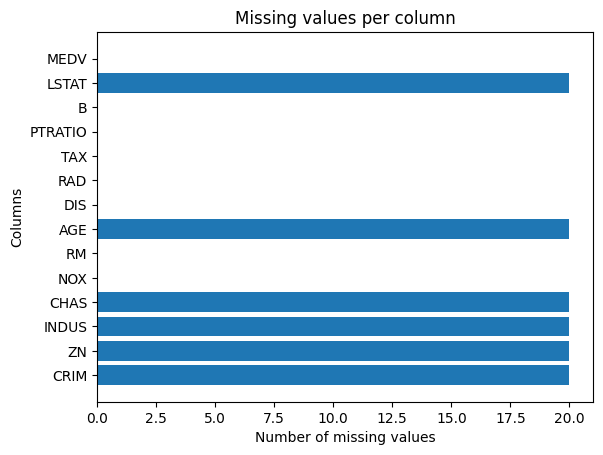

In [258]:
import matplotlib.pyplot as plt

missing_cnt = df.isnull().sum()

plt.barh(missing_cnt.index, missing_cnt.values)
plt.ylabel('Columns')
plt.xlabel('Number of missing values')
plt.title('Missing values per column')

plt.show()

In [259]:
from sklearn.impute import SimpleImputer
from reparo import CDI, FRNNI, HotDeckImputation, KNNImputer, PMM, SICE, MICE

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR # Instead of GaussianNB, I used SVR because it is a regression problem

imputers = [
    SimpleImputer(strategy='median'),
    SimpleImputer(strategy='mean'),
    SimpleImputer(strategy='most_frequent'),
    SimpleImputer(strategy='constant', fill_value=0),
    CDI(),
    FRNNI(),
    HotDeckImputation(),
    KNNImputer(),
    PMM(),
    SICE(),
    MICE()
]

models = [
    LinearRegression(),
    SVR(),
    DecisionTreeRegressor(),
    RandomForestRegressor()
]

scaler = StandardScaler() # For SVR

y = df['MEDV']
columns = ['Imputation Algorithms', 'Prediction algorithms', 'Accuracy']
table = pd.DataFrame(columns=columns)


for i, imputer in enumerate(imputers):
    if i < 4:
        imputed_df = imputer.fit_transform(df)
        df = pd.DataFrame(imputed_df, columns=df.columns)
    else:
        imputer.apply(df, df.columns)

    X = df.drop('MEDV', axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    for model in models:
        model_str = str(model).split('(')[0]
        
        # SVR needs to be scaled for a better performance
        if model_str == 'SVR':
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = model.score(X_test, y_test)

        table = pd.concat([table, pd.DataFrame([[imputer, model_str, accuracy]], columns=columns)], ignore_index=True)

table.sort_values(by=['Accuracy'], ascending=False)


,Imputation Algorithms,Prediction algorithms,Accuracy
23,FRNNI(),RandomForestRegressor,0.884946
35,PMM(),RandomForestRegressor,0.883644
27,HotDeckImputation(),RandomForestRegressor,0.880254
15,"SimpleImputer(fill_value=0, strategy='constant')",RandomForestRegressor,0.879686
43,MICE(),RandomForestRegressor,0.874432
11,SimpleImputer(strategy='most_frequent'),RandomForestRegressor,0.873194
7,SimpleImputer(),RandomForestRegressor,0.872951
3,SimpleImputer(strategy='median'),RandomForestRegressor,0.870272
19,CDI(),RandomForestRegressor,0.870266
39,SICE(),RandomForestRegressor,0.869831


## Conclusion

For the Boston Housing Dataset, it can be observed that the Random Forest Regressor algorithm generally performs better in terms of accuracy compared to Decision Tree Regressor and Linear Regression algorithms. Among the imputation algorithms, FRNNI(), PMM(), and HotDeckImputation() perform the best, while MICE() and SICE() perform relatively worse.

Lastly, the Support Vector Machines Regressor performs the worst in terms of accuracy, no matter which imputation algorithm is used.